### Shelf waves

Which waves am I looking for?

In [1]:
import cmocean as cmo
import gsw
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import scipy as sc, scipy.io
from scipy import interpolate

%matplotlib inline

In [2]:
bat_file = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/gridGlob.nc'
bathy = Dataset(bat_file)

depth = bathy['Depth'][:]
X = bathy['X'][:]
Y = bathy['Y'][:]
Z = bathy['Z'][:]
hfacC = bathy['HFacC']
hfacW = bathy['HFacW']
hfacS = bathy['HFacS']

Yv = bathy['Yp1'][:]
Xu = bathy['Xp1'][:]
Zw = bathy['Zl'][:]

maskC = np.ma.getmask(np.ma.masked_equal(hfacC, 0))
maskW = np.ma.getmask(np.ma.masked_equal(hfacW, 0))
maskS = np.ma.getmask(np.ma.masked_equal(hfacS, 0))

In [3]:
def plot_CS_wave(Vmean, Umean, Wmean, SSHmean, time):    
    fig, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(18, 10))

    for ax in (ax1,ax2,ax3):
        ax.set_facecolor('#8b7765')

    ax1.contourf(Yv/1000, Z, Vmean[:, :, 240],15, vmin=-0.2, vmax=0.2, cmap=cmo.cm.balance)
    ax2.contourf(Y/1000, Z, Umean[:, :, 240]-0.3,15, vmin=-0.5, vmax=0.5, cmap=cmo.cm.balance)
    ax3.contourf(Y/1000, Zw, Wmean[:, :, 240],15, vmin=-0.003, vmax=0.003, cmap=cmo.cm.balance)

    ax1.set_ylabel('Depth / m')
    ax1.set_xlabel('Cross-shelf distance/ km')
    ax1.set_title('V')
    ax2.set_ylabel('Depth / m')
    ax2.set_xlabel('Cross-shelf distance / km')
    ax2.set_title('U-0.3 m/s')

    for ax in (ax4,ax5,ax6):
        ax.axhline(0, color='gold')

    ax4.plot(Yv/1000, Vmean[0, :, 240], c='0.3')
    ax5.plot(Y/1000, Umean[0, :, 240], c='0.3')
    ax6.plot(Y/1000, SSHmean[:, 240], c='0.3')

    ax4.set_ylabel('m/s')
    ax4.set_xlabel('Cross-shelf distance/ km')
    ax4.set_title('V surface')
    ax5.set_ylabel('m/s')
    ax5.set_xlabel('Cross-shelf distance / km')
    ax5.set_title('U-0.3 m/s surface')
    ax6.set_xlabel('Cross-shelf distance / km')
    ax6.set_title('SSH')
    ax6.set_ylabel('m')
    ax1.text(10,-100,'day %1.1f' %(time/2.))


mean fields during advective phase


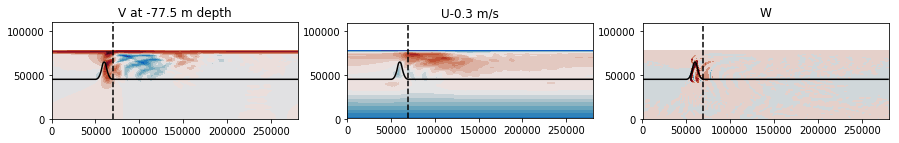

In [4]:
st_file = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/stateGlob.nc'
state = Dataset(st_file)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

start = 8
end = 19
zind = 15

V_h = np.ma.masked_array(np.mean(state['V'][start:end,zind,:,:], axis=0), mask = maskS[zind,:,:])
U_h = np.ma.masked_array(np.mean(state['U'][start:end,zind,:,:]-0.3, axis=0), mask = maskW[zind,:,:])
W_h = np.ma.masked_array(np.mean(state['W'][start:end,zind,:,:], axis=0), mask = maskC[zind,:,:])


ax1.contourf(X,Yv,V_h,20, cmap=cmo.cm.balance, vmin=-0.2, vmax=0.2)
ax2.contourf(Xu,Y,U_h,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
ax3.contourf(X,Y,W_h,20, cmap=cmo.cm.balance, vmin=-0.005, vmax=0.005)

ax1.set_aspect(1)
ax2.set_aspect(1)
ax3.set_aspect(1)

ax1.set_title('V at %1.1f m depth' %Z[zind])
ax2.set_title('U-0.3 m/s')
ax3.set_title('W')
for ax in [ax1,ax2,ax3]:
    ax.contour(X,Y,depth,levels=[150], colors=['k'])
    ax.axvline(X[240], color='k', linestyle='--')
    
print('mean fields during advective phase')

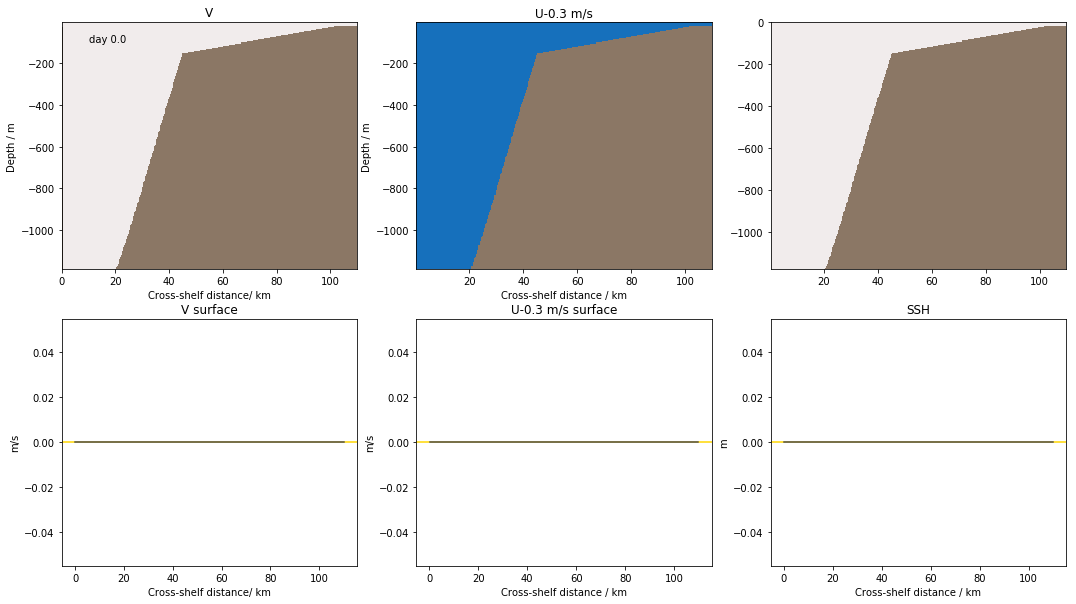

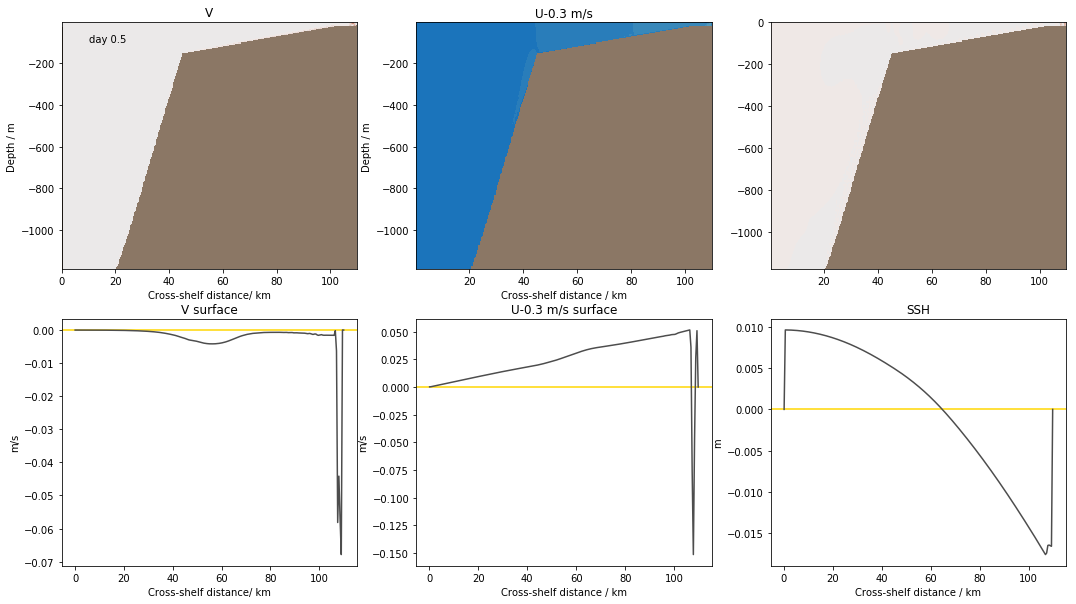

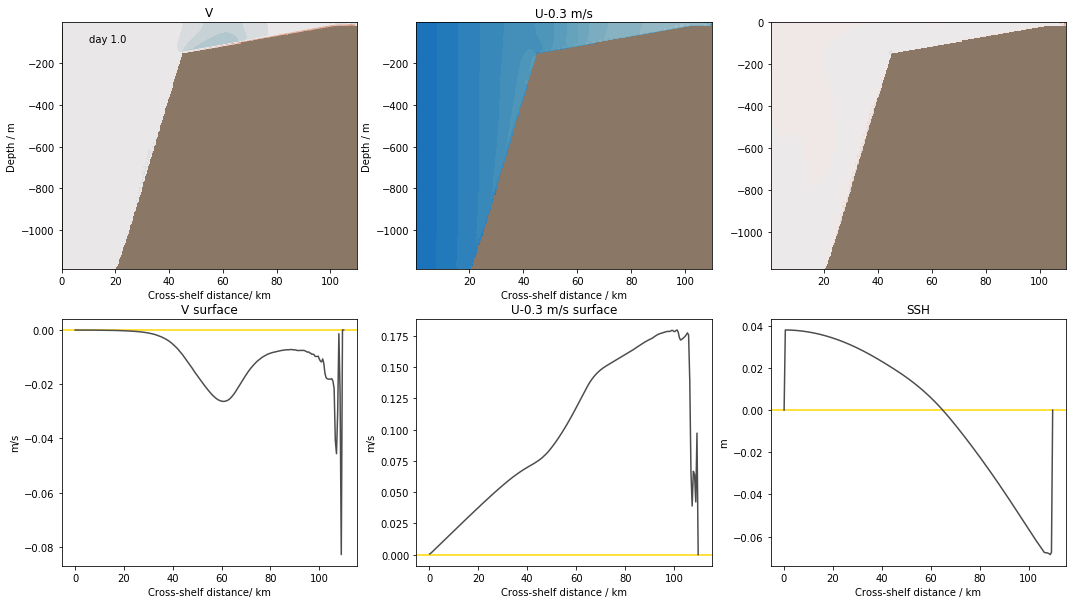

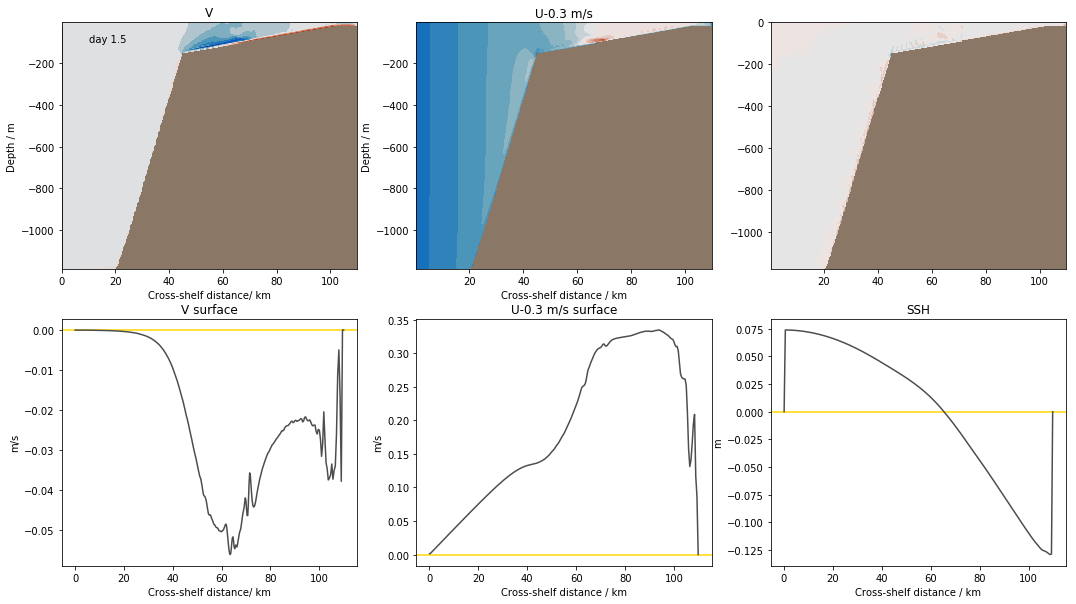

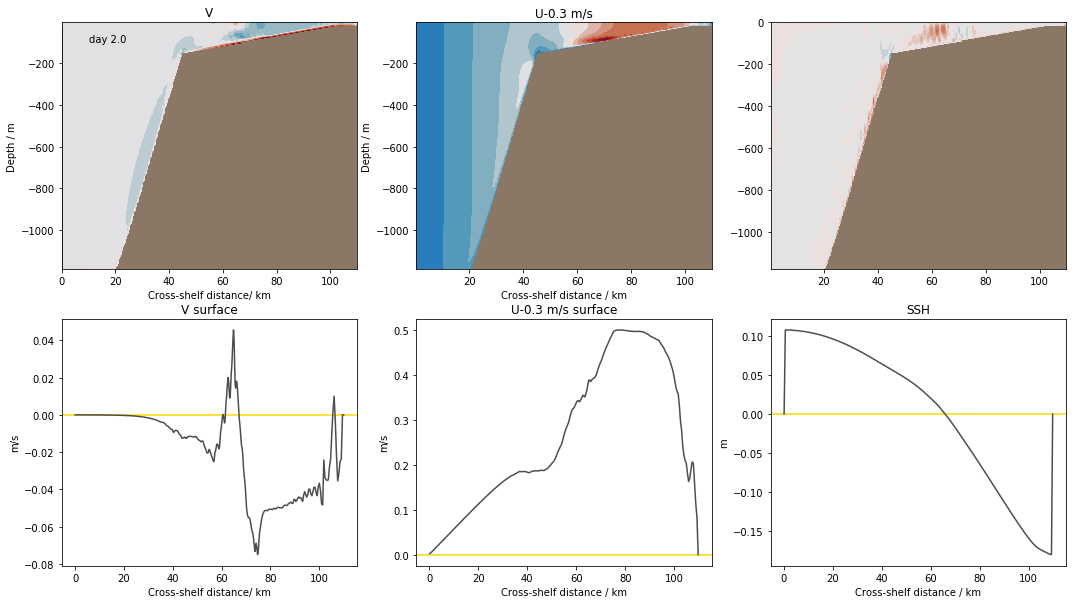

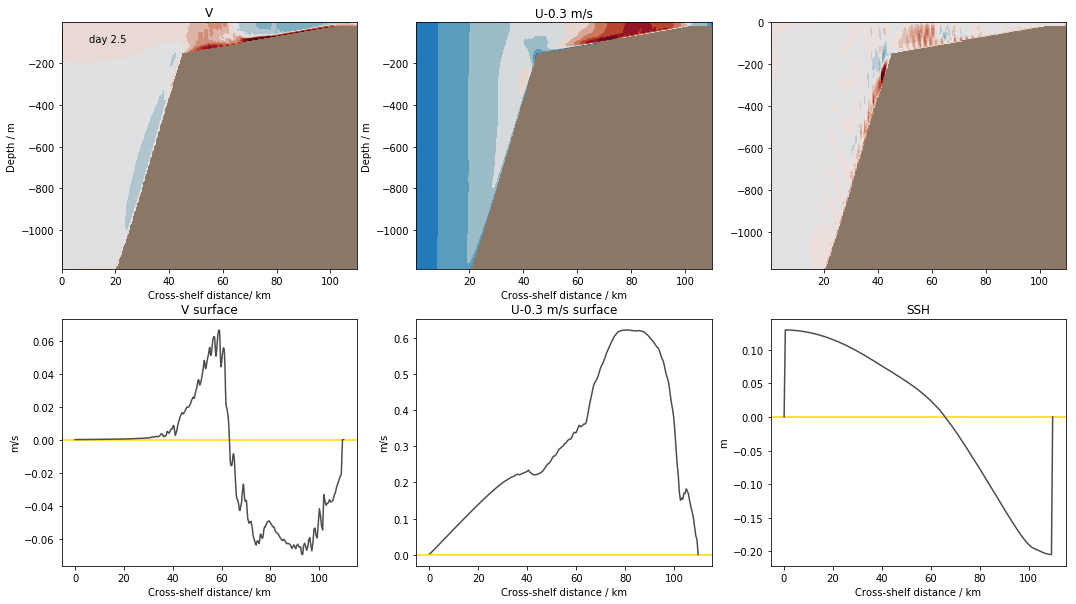

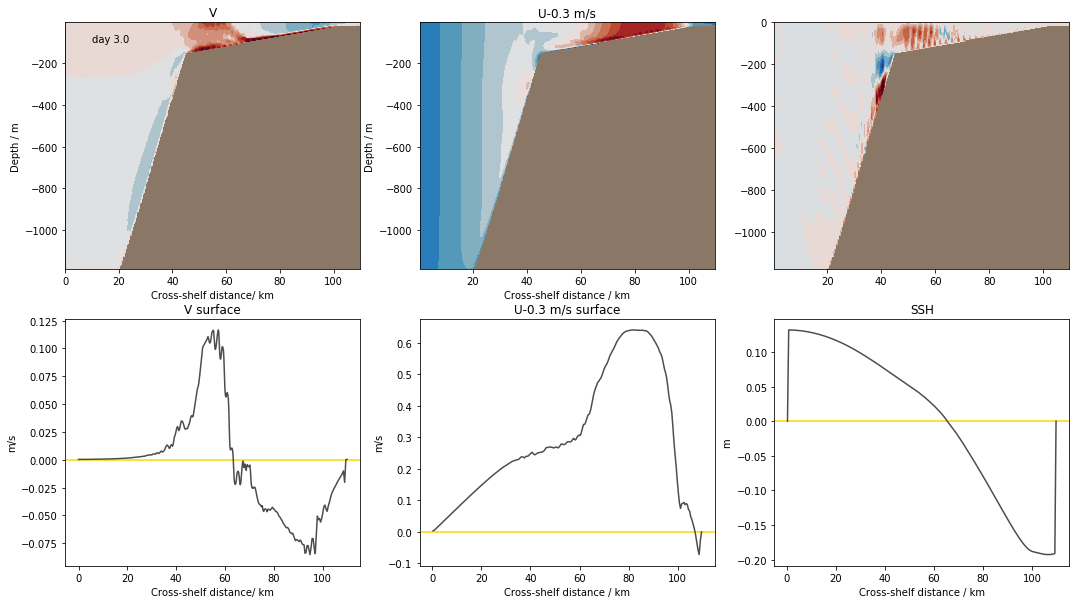

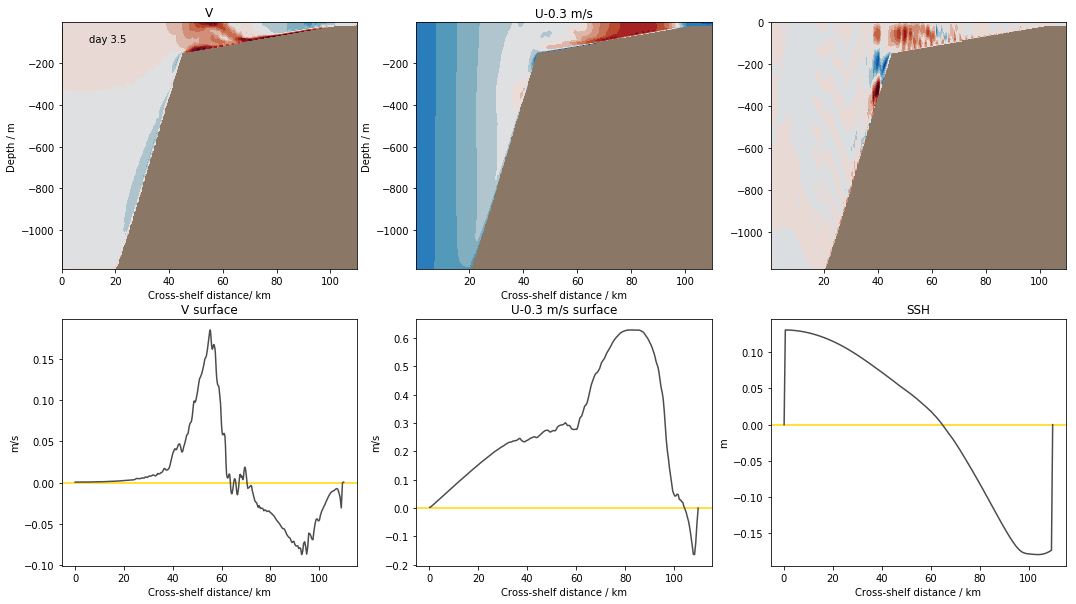

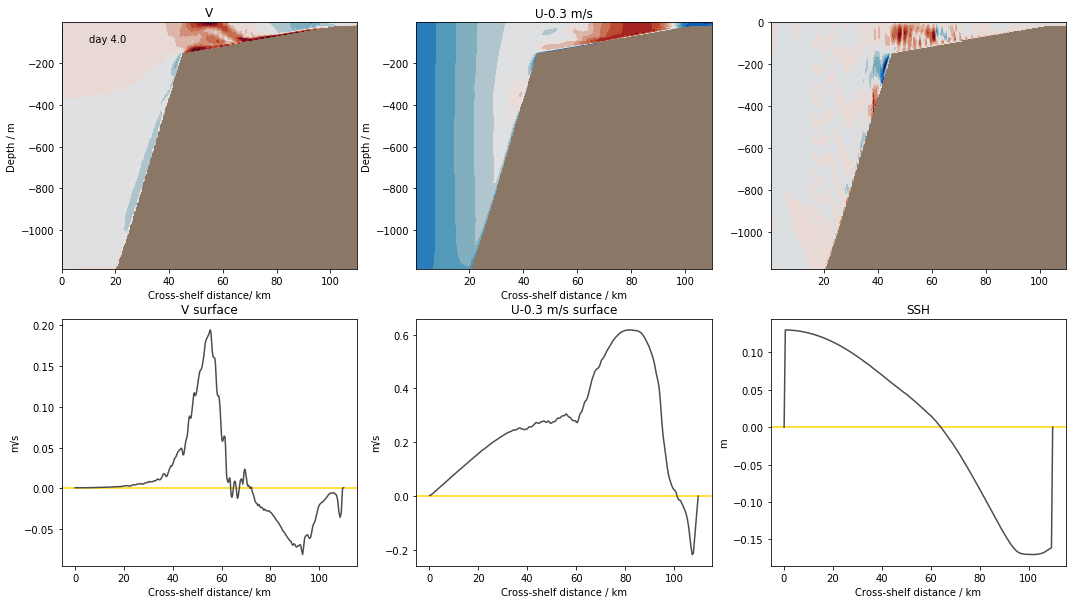

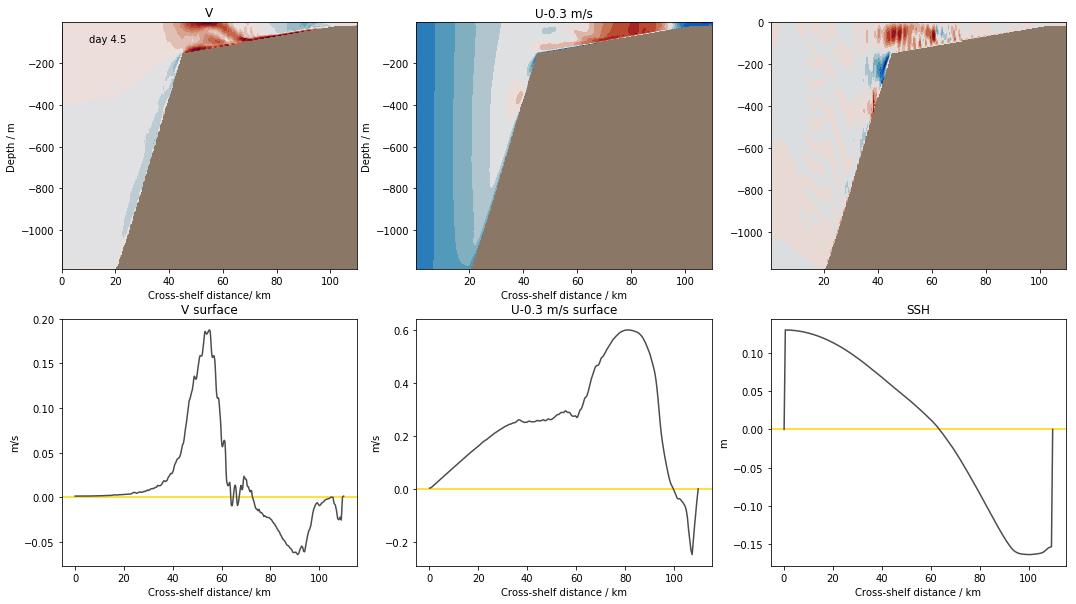

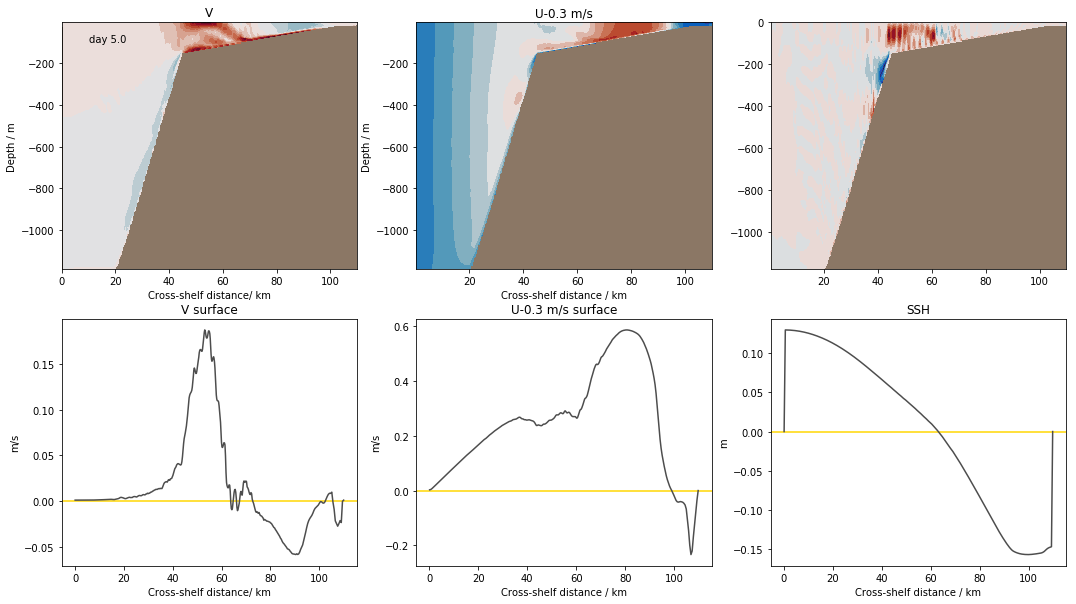

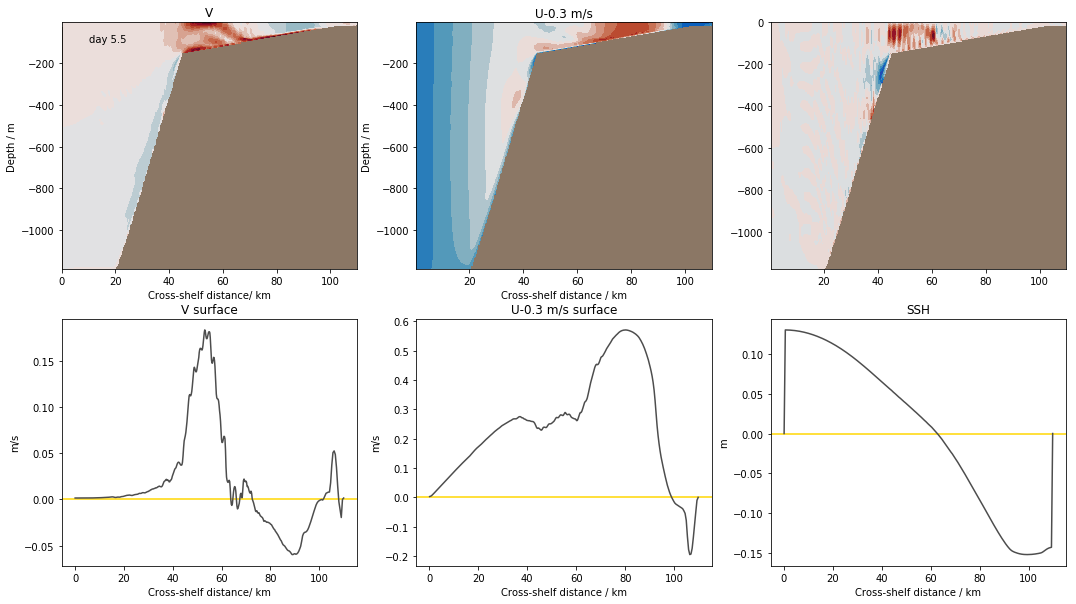

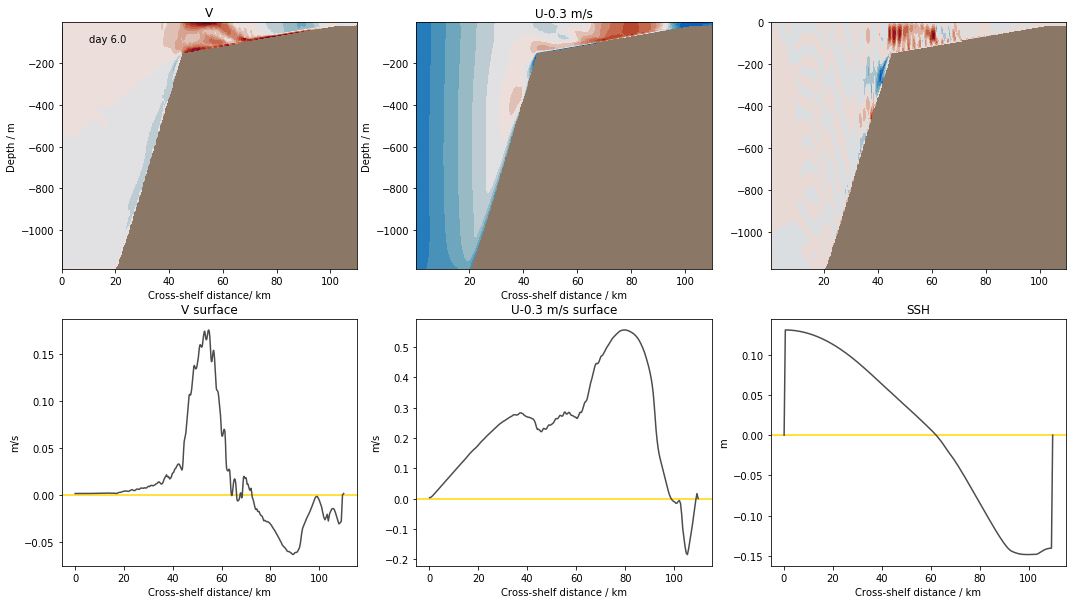

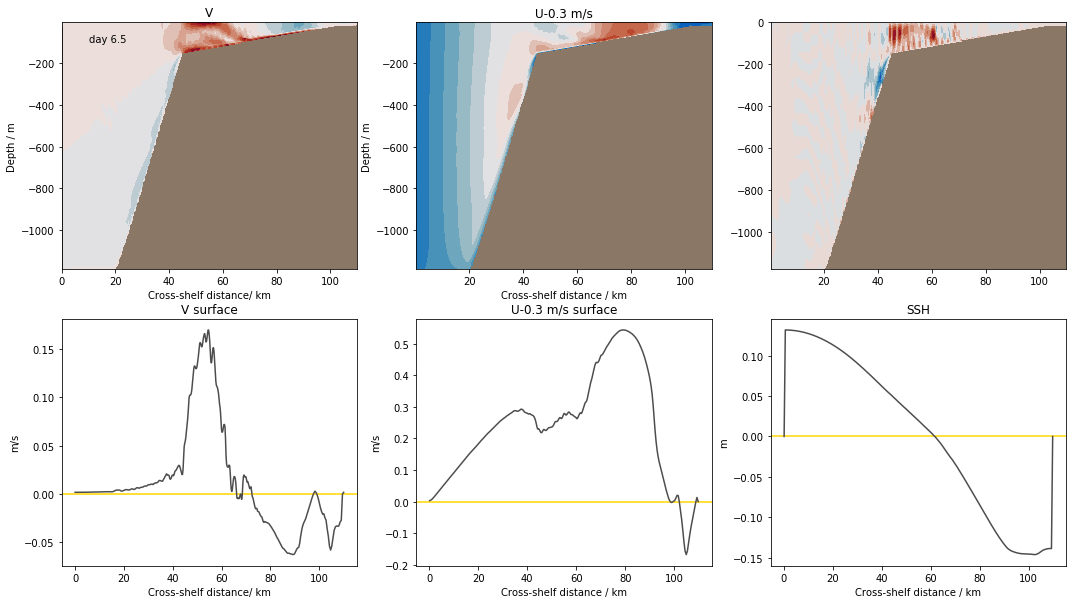

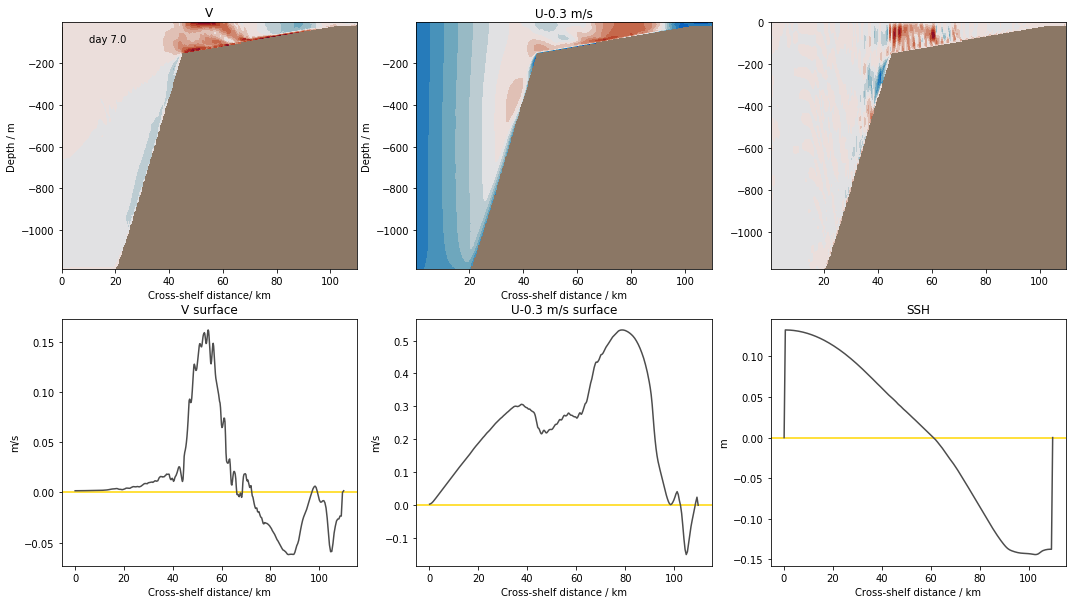

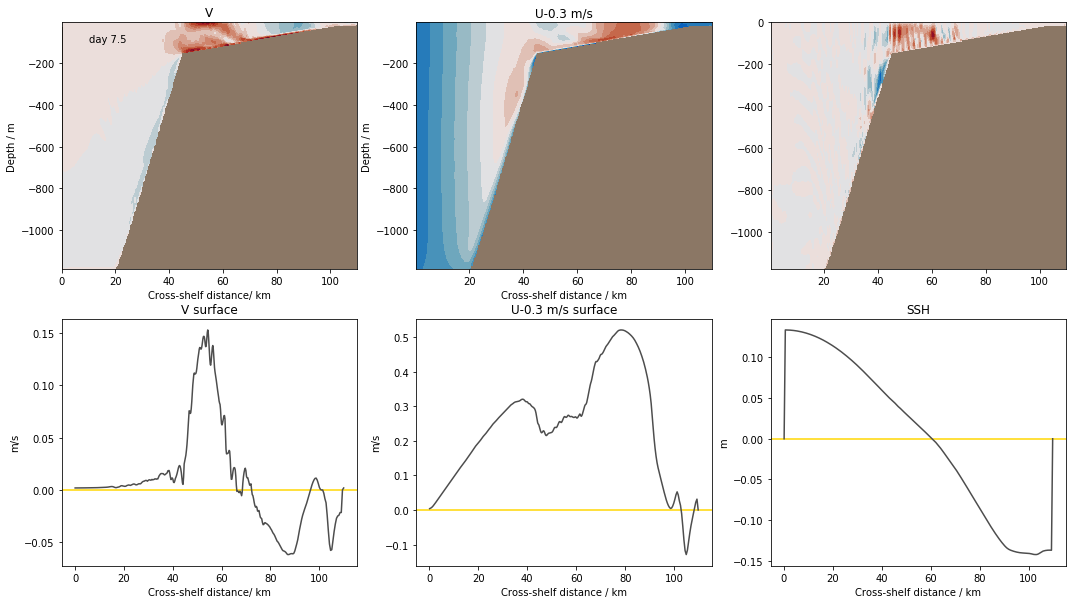

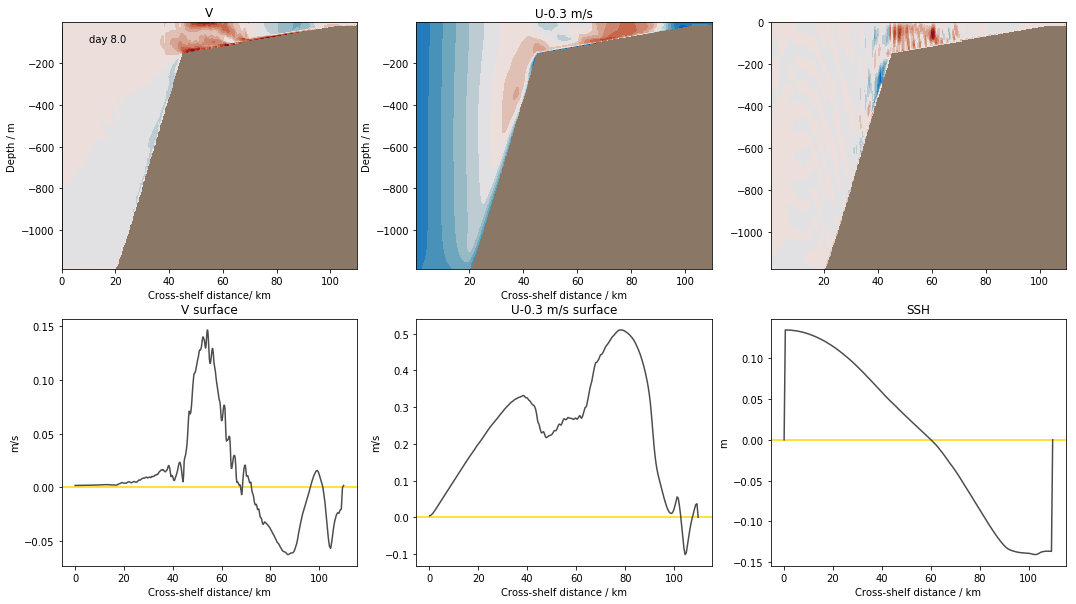

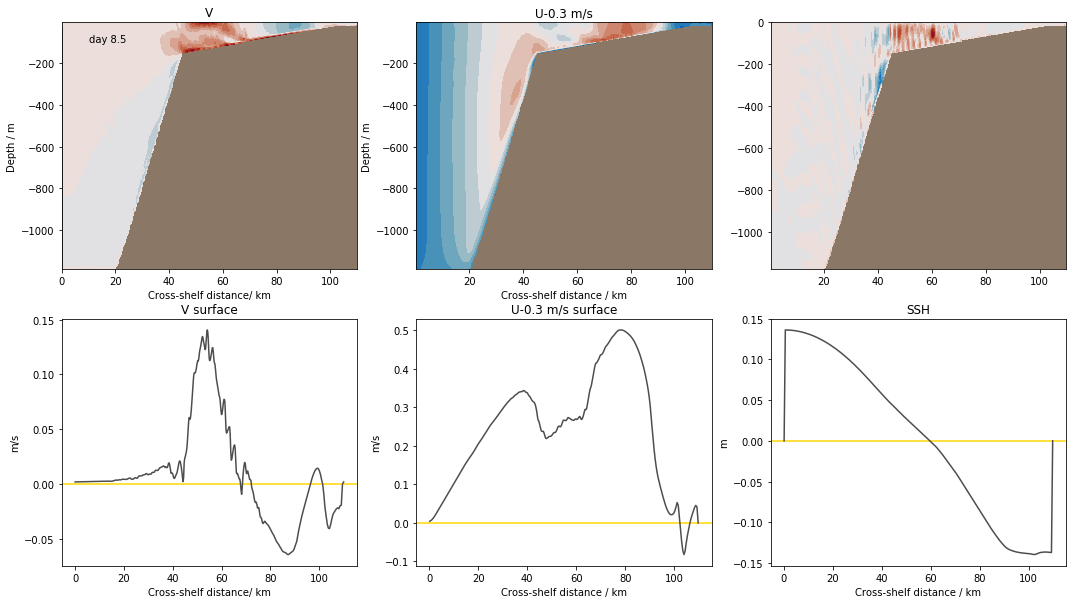

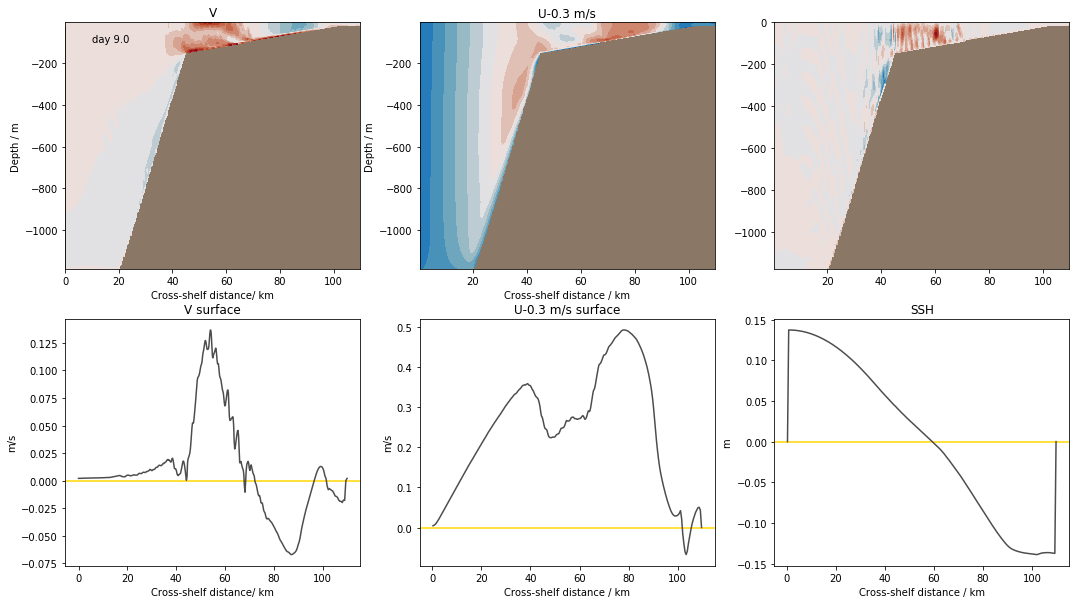

In [5]:
times = np.arange(0,len(state['T']))

for t0 in times:
    start = t0
    end = t0+1

    Vmean = np.ma.masked_array(np.mean(state['V'][start:end,:,:,:], axis=0), mask = maskS)
    Umean = np.ma.masked_array(np.mean(state['U'][start:end,:,:,:], axis=0), mask = maskW)
    Wmean = np.ma.masked_array(np.mean(state['W'][start:end,:,:,:], axis=0), mask = maskC)
    SSHmean = np.mean(state['Eta'][start:end,:,:], axis=0)


    plot_CS_wave(Vmean, Umean, Wmean,SSHmean, start)